In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [3]:
# Load the dataset
file_path = '/content/spotify dataset.csv'
spotify_data = pd.read_csv(file_path)

In [4]:
# Data Preprocessing
# Drop rows with missing values
spotify_data.dropna(subset=['track_name', 'track_artist', 'track_album_name'], inplace=True)

In [5]:
# Feature Scaling: Standardize numerical audio features
audio_features = ['danceability', 'energy', 'loudness', 'speechiness',
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
scaler = StandardScaler()
spotify_data[audio_features] = scaler.fit_transform(spotify_data[audio_features])

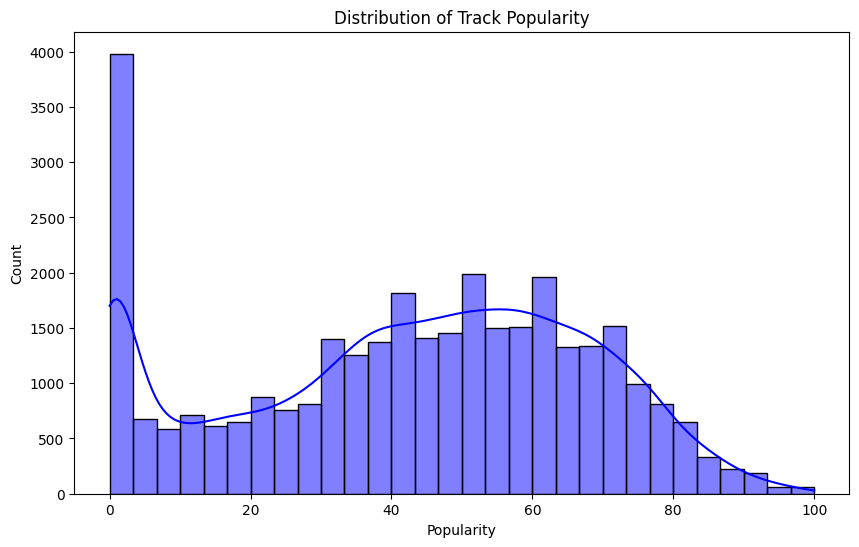

In [6]:
# Data Analysis & Visualization
# Plot distribution of track popularity
plt.figure(figsize=(10,6))
sns.histplot(spotify_data['track_popularity'], bins=30, kde=True, color='blue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

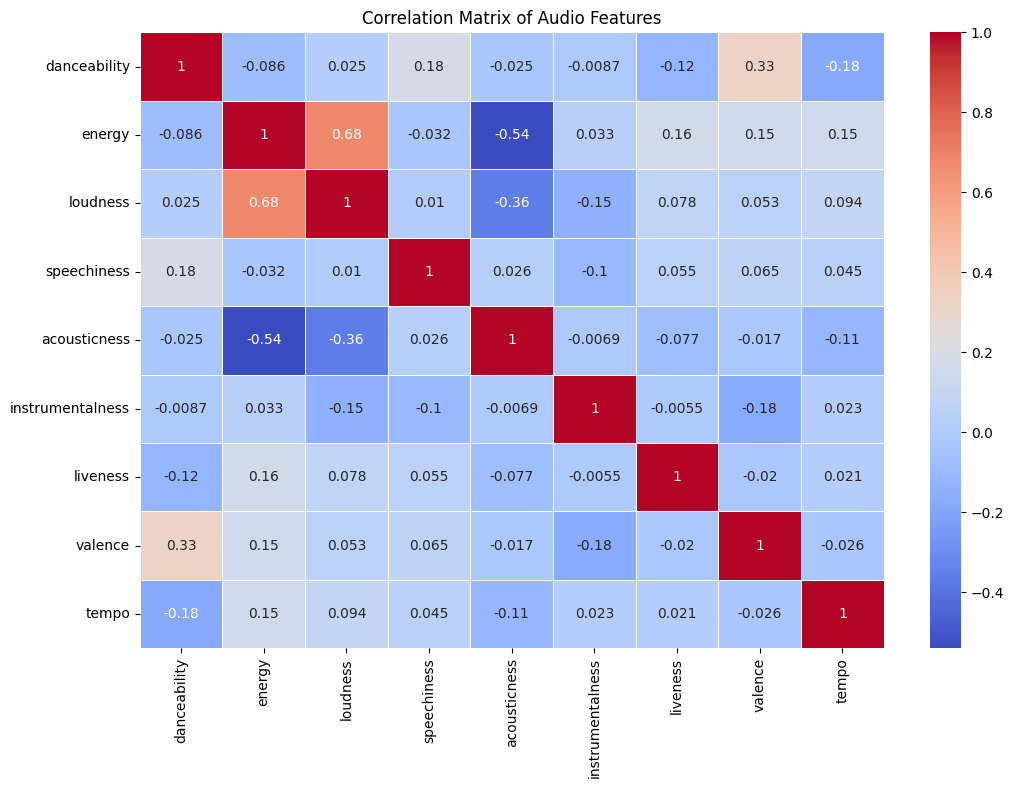

In [7]:
# Correlation Matrix
plt.figure(figsize=(12,8))
correlation_matrix = spotify_data[audio_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Audio Features')
plt.show()

In [8]:
# Cluster Analysis using KMeans
# Cluster based on playlist genre and audio features
X = spotify_data[['playlist_genre'] + audio_features]

In [9]:
# Convert categorical column 'playlist_genre' to numerical values using one-hot encoding
X = pd.get_dummies(X, columns=['playlist_genre'], drop_first=True)

In [10]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
spotify_data['cluster'] = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


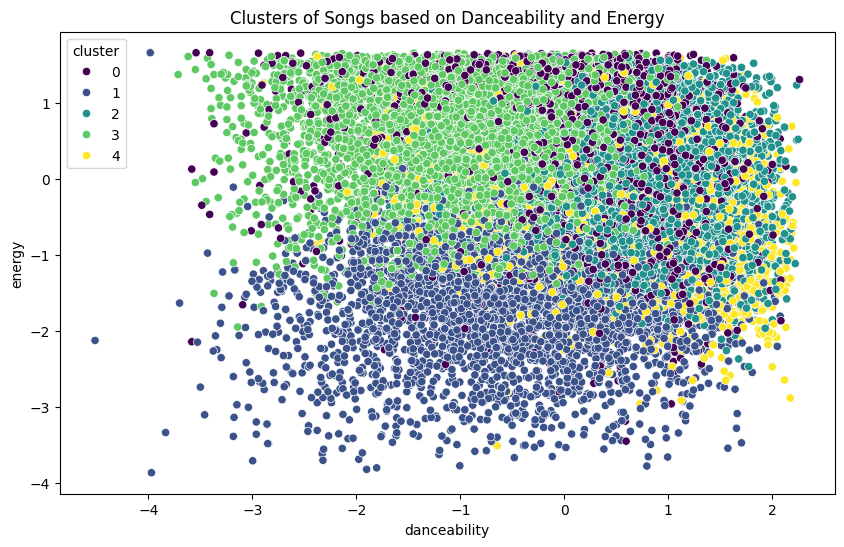

In [11]:
# Plot the clusters based on 'danceability' and 'energy'
plt.figure(figsize=(10,6))
sns.scatterplot(data=spotify_data, x='danceability', y='energy', hue='cluster', palette='viridis')
plt.title('Clusters of Songs based on Danceability and Energy')
plt.show()

In [12]:
# Recommendation System
# Using Cosine Similarity to recommend songs based on audio features
def recommend_songs(track_id, data, features, top_n=5):
    # Find the song by track_id
    song = data[data['track_id'] == track_id]

    if song.empty:
        return "Track ID not found in the dataset."

    # Calculate cosine similarity between the input song and the rest
    similarities = cosine_similarity(data[features], song[features])

    # Sort by similarity and get the top n recommendations
    similar_indices = similarities.argsort().flatten()[-top_n-1:-1]

    # Return the track names of the top recommendations
    return data.iloc[similar_indices][['track_name', 'track_artist']]

In [13]:
# Example usage: Replace '6f807x0ima9a1j3VPbc7VN' with any valid track_id from the dataset
track_id_example = '6f807x0ima9a1j3VPbc7VN'
recommended_songs = recommend_songs(track_id_example, spotify_data, audio_features)
print("Recommended Songs:")
print(recommended_songs)

Recommended Songs:
                                          track_name track_artist
0  I Don't Care (with Justin Bieber) - Loud Luxur...   Ed Sheeran
1                    Memories - Dillon Francis Remix     Maroon 5
0  I Don't Care (with Justin Bieber) - Loud Luxur...   Ed Sheeran
1                    Memories - Dillon Francis Remix     Maroon 5
0  I Don't Care (with Justin Bieber) - Loud Luxur...   Ed Sheeran
